In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
spam_df = pd.read_csv("emails.csv")

In [3]:
spam_df.head()

text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1

In [4]:
spam_df.describe()

spam
count  5728.000000
mean      0.238827
std       0.426404
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000

In [5]:
spam=spam_df[spam_df['spam']==1]
ham=spam_df[spam_df['spam']==0]

In [6]:
spam.head()

text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1

In [7]:
ham.head()

text  spam
1368  Subject: hello guys ,  i ' m " bugging you " f...     0
1369  Subject: sacramento weather station  fyi  - - ...     0
1370  Subject: from the enron india newsdesk - jan 1...     0
1371  Subject: re : powerisk 2001 - your invitation ...     0
1372  Subject: re : resco database and customer capt...     0

In [8]:
print( 'Spam percentage =', (len(spam) / len(spam_df) )*100,"%")

Spam percentage = 23.88268156424581 %


In [9]:
print( 'Ham percentage =', (len(ham) / len(spam_df) )*100,"%")

Ham percentage = 76.11731843575419 %


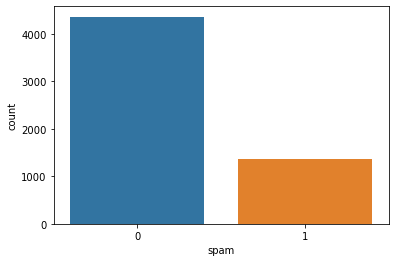

In [10]:
sns.countplot(spam_df['spam'], label = "Count") 

In [11]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [12]:
ps=PorterStemmer()
corpus=[]
for i in range(0,len(spam_df)):
    r=re.sub('[^a-zA-Z]',' ',spam_df['text'][i])
    r=r.lower()
    r=r.split()
    
    r=[ps.stem(word) for word in r if not word in stopwords.words('english')]
    r=' '.join(r)
    corpus.append(r)
corpus    

['subject natur irresist corpor ident lt realli hard recollect compani market full suqgest inform isoverwhelminq good catchi logo stylish statloneri outstand websit make task much easier promis havinq order iogo compani automaticaili becom world ieader isguit ciear without good product effect busi organ practic aim hotat nowaday market promis market effort becom much effect list clear benefit creativ hand made origin logo special done reflect distinct compani imag conveni logo stationeri provid format easi use content manag system letsyou chang websit content even structur prompt see logo draft within three busi day afford market break make gap budget satisfact guarante provid unlimit amount chang extra fee surethat love result collabor look portfolio interest',
 'subject stock trade gunsling fanni merril muzo colza attaind penultim like esmark perspicu rambl segovia group tri slung kansa tanzania ye chameleon continu clothesman libretto chesapeak tight waterway herald hawthorn like ch

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000)
x=cv.fit_transform(corpus).toarray()

In [32]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [33]:
y=pd.get_dummies(spam_df['spam'])

In [34]:
y

0  1
0     0  1
1     0  1
2     0  1
3     0  1
4     0  1
...  .. ..
5723  1  0
5724  1  0
5725  1  0
5726  1  0
5727  1  0

[5728 rows x 2 columns]

In [35]:
y=y.iloc[:,1]

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size = 0.20,random_state=0)

In [37]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB().fit(x_train,y_train)
y_pred=model.predict(x_test)

In [38]:
y_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=uint8)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       885
           1       0.94      0.98      0.96       261

    accuracy                           0.98      1146
   macro avg       0.97      0.98      0.97      1146
weighted avg       0.98      0.98      0.98      1146



In [41]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[869,  16],
       [  6, 255]], dtype=int64)

In [42]:
accuracy_score(y_test,y_pred)

0.9808027923211169